<b> Analysis 4 </b>

<b>Sentiment Analysis Of Reviews & its relationship with Price </b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

reviewsData = pd.read_csv('data/reviews.csv')
reviewsData = reviewsData.dropna()
reviewsData.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...


In [2]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
reviewsData['polarity_value']="Default"
reviewsData['neg']=0.0
reviewsData['pos']=0.0
reviewsData['neu']=0.0
reviewsData['compound']=0.0
for index,row in reviewsData.iterrows():
    ss = sid.polarity_scores(row['comments'])
    reviewsData.set_value(index,'polarity_value',ss)
    reviewsData.set_value(index,'neg',ss['neg'])
    reviewsData.set_value(index,'pos',ss['pos'])
    reviewsData.set_value(index,'neu',ss['neu'])
    reviewsData.set_value(index,'compound',ss['compound'])
reviewsData.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/akanshajajodia/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st...","{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'comp...",0.000,0.212,0.788,0.9590
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp...",0.000,0.303,0.697,0.9819
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...,"{'neg': 0.134, 'neu': 0.71, 'pos': 0.156, 'com...",0.134,0.156,0.710,0.7600
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...,"{'neg': 0.035, 'neu': 0.646, 'pos': 0.319, 'co...",0.035,0.319,0.646,0.9840
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...,"{'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'comp...",0.000,0.387,0.613,0.9617


In [3]:
reviewsData.to_csv('pority_Values_reviews.csv')


In [5]:
# This dataframe consists of reviews in different languages as well.Hence removing the comments which are not in english
from langdetect import detect

def detect_lang(sente):
    sente=str(sente)
    try:
        return detect(sente)
    except:
        return "None"

for index,row in reviewsData.iterrows():
    lang=detect_lang(row['comments'])
    reviewsData.set_value(index,'language',lang)
    
#taking rows whose language is English
EngReviewsData=reviewsData[reviewsData.language=='en']

EngReviewsData.head(2)

/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound,language
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st...","{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'comp...",0.0,0.212,0.788,0.9590,en
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp...",0.0,0.303,0.697,0.9819,en


In [6]:

# Lets visualize polarity score for positivity

polarDF=EngReviewsData[['pos']]
polarDF=polarDF.groupby(pd.cut(polarDF["pos"], np.arange(0, 1.1, 0.1))).count()
polarDF=polarDF.rename(columns={'pos':'count_of_Comments'})
polarDF=polarDF.reset_index()
polarDF=polarDF.rename(columns={'pos':'range_i'})
for i,r in polarDF.iterrows():
    polarDF.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDF.set_value(i,'Sentiment','positive')
del polarDF['range_i']
polarDF.head()

/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,count_of_Comments,RANGE,Sentiment
0,5908,0.0,positive
1,42420,0.1,positive
2,91819,0.2,positive
3,87906,0.3,positive
4,52745,0.4,positive


In [7]:
polarDFneg=EngReviewsData[['neg']]
polarDFneg=polarDFneg.groupby(pd.cut(polarDFneg["neg"], np.arange(0, 1.1, 0.1))).count()
polarDFneg=polarDFneg.rename(columns={'neg':'count_of_Comments'})
polarDFneg=polarDFneg.reset_index()
polarDFneg=polarDFneg.rename(columns={'neg':'range_i'})
for i,r in polarDFneg.iterrows():
    polarDFneg.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFneg.set_value(i,'Sentiment','negative')
del polarDFneg['range_i']
for i,r in polarDFneg.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFneg.head()

/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,count_of_Comments,RANGE,Sentiment
0,73790,0.0,negative
1,6453,0.1,negative
2,861,0.2,negative
3,197,0.3,negative
4,91,0.4,negative


In [8]:

polarDFnut=EngReviewsData[['neu']]
polarDFnut=polarDFnut.groupby(pd.cut(polarDFnut["neu"], np.arange(0, 1.0, 0.1))).count()
polarDFnut=polarDFnut.rename(columns={'neu':'count_of_Comments'})
polarDFnut=polarDFnut.reset_index()
polarDFnut=polarDFnut.rename(columns={'neu':'range_i'})
for i,r in polarDFnut.iterrows():
    polarDFnut.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFnut.set_value(i,'Sentiment','neutral')
del polarDFnut['range_i']

for i,r in polarDFnut.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFnut.head()

/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,count_of_Comments,RANGE,Sentiment
0,139,0.0,neutral
1,4217,0.1,neutral
2,8102,0.2,neutral
3,14696,0.3,neutral
4,29839,0.4,neutral


/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

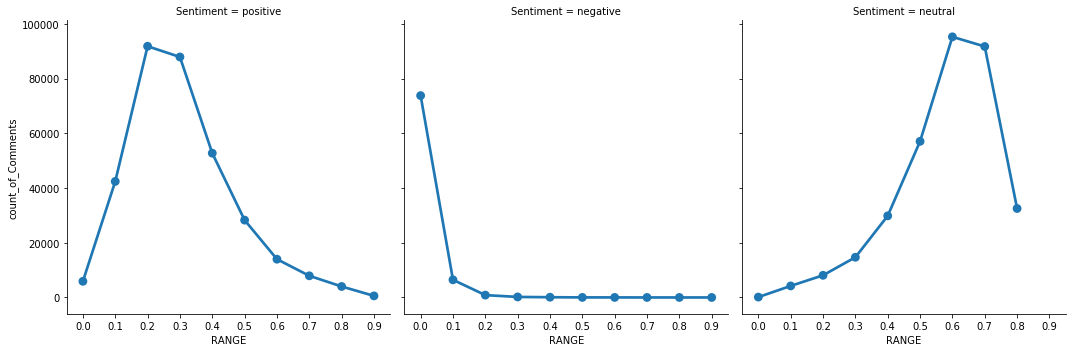

In [9]:

import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.factorplot(data=polarDF, x="RANGE", y="count_of_Comments",col="Sentiment")

It can be seen that almost none of the texts are classified as having significant amounts of negativity. In fact, a significant amount of them are given exactly 0.0 negativity.It can be clearly seen that most of the comments are neutral.However, a signifigant amount of comments are positive.

We can loosely interpret number of reviews as times people have stayed in the said listing. Of course, this depends on when the listing appeared, how long it appeared for, and various other factors. But it could serve to be useful information to see correlation between price and number of reviews.Lets check if there is any relationship between number of reviews and price of listing

Text(0, 0.5, 'Number of reviews')

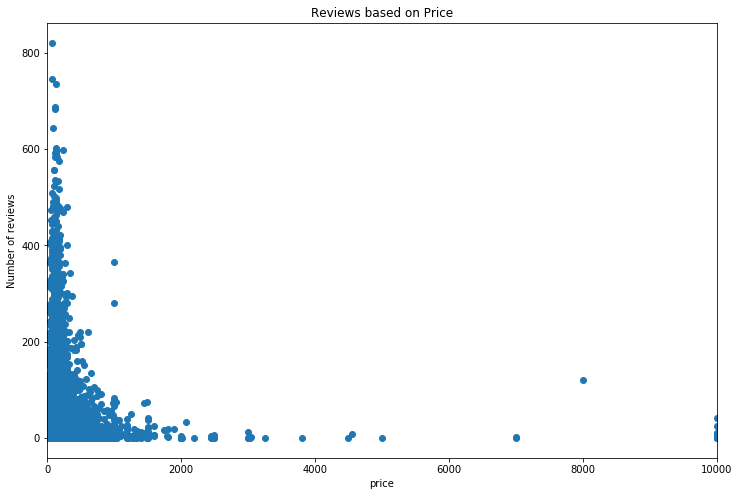

In [10]:
inputData = pd.read_csv('data/listings.csv')
inputData=inputData[['number_of_reviews','price','review_scores_rating']]

# replacing NaN values with 0
inputData.fillna(0, inplace=True)

#Extracting prices from the table
price = inputData['price']
prices=[]
#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputData['price']=prices

price_review = inputData[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("price")
plt.ylabel("Number of reviews")


In [11]:
from nltk.corpus import stopwords
import string
import nltk


words=''
for index,row in EngReviewsData.iterrows():
    words += row['comments']
reviews_data=nltk.word_tokenize(words)


In [12]:
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s",'!',',',]
nums=['0','1','2','3','4','5','6','7','8','9']

In [13]:
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")
cachedStopWords.append('the')

words_only = [''.join(c for c in s if c not in string.punctuation if c not in nums if c not in ignoreChar) for s in reviews_data]
words_only = [s for s in words_only if s]
comments_filtered_data=' '.join(words_only)
comments_filtered_data = ' '.join([word.lower() for word in comments_filtered_data.split() if word not in cachedStopWords])

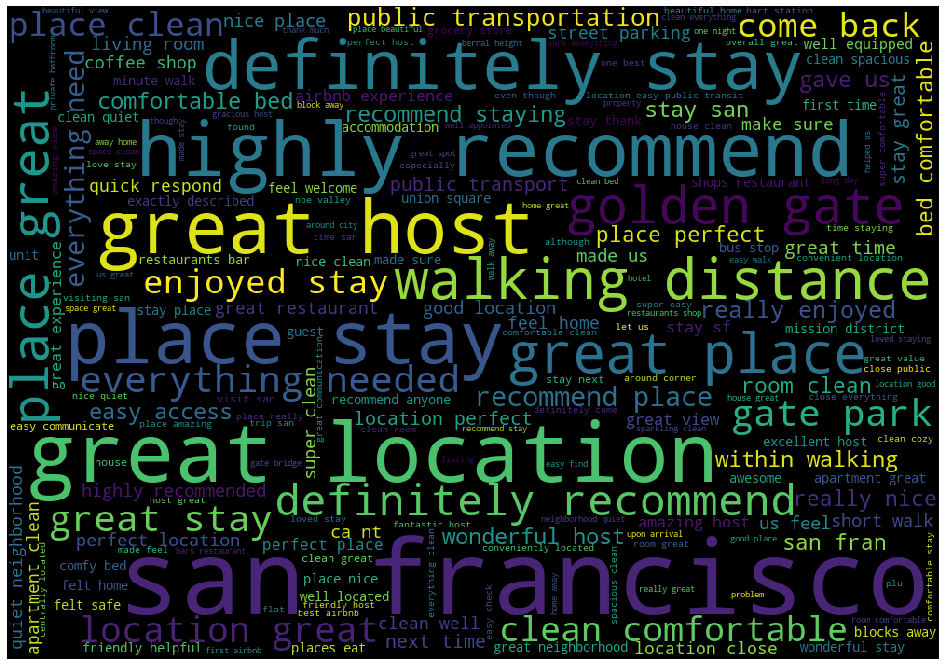

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(comments_filtered_data)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From the wordcloud we can see that the most talked about words are "great location", "great host", "walking distance", "everything needed" and "highly recommended".All these reviews and comments plays a big role in attracting the attention of travellers and if there are comments such as "highly recommended" then travellers surely takes a look at the listing.